# Homework 2: Perceptron, Logistic Regression, Stocashtic Gradient Descent



This assignment is due on Moodle by **11:59pm on Friday Oct 4**. 
Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.
Your solutions to computational questions should include any specified Python code and results 
as well as written commentary on your conclusions.
Remember that you are encouraged to discuss the problems with your instructors and classmates, 
but **you must write all code and solutions on your own**. For a refresher on the course **Collaboration Policy** click [here](https://github.com/BoulderDS/CSCI5622-Machine-Learning/blob/master/info/syllabus.md#collaboration-policy).

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda (Version: 2019.07) with Python 3.7. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- Extra credit questions will not make your homework total scores overflow i.e., not exceed 35% in the final grade. But you can use extra credit in one homework to cover another.

**Acknowledgment** : Chris Ketelsen


**Please put your name and cuidentity username.**

**Name**:

In [30]:
import math
import pickle
import gzip
import numpy as np
import pandas
import matplotlib.pylab as plt
%matplotlib inline

### [40 points] Problem 1 - Perceptron Training

Consider a binary classification problem on the following dataset:

| x1   | x2         | x3      | y| 
|:------:|:------------:| :-----------:|---:|
|0|0|0|-1|
|0|0|1|1|
|0|1|0|1|
|1|0|0|1|
|0|1|1|-1|
|1|1|0|-1|
|1|0|1|-1|
|1|1|1|1|

We are going to experiment with the Perceptron algorithm in this problem.

**Part 1 [5 points]:** Complete the `perceptron_train` function and report the results.

In [58]:
# Do not change - unless needed
data = np.array([
    [0, 0, 0, 1, 0, 1, 1, 1],
    [0, 0, 1, 0, 1, 1, 0, 1],
    [0, 1, 0, 0, 1, 0, 1, 1],
    [-1, 1, 1, 1, -1, -1, -1, 1]
])
data = np.transpose(data)
# Initialize the weights and bias (note that we use a non-standard initialization here).
weights = np.array([0, 0.5, 0.5])
bias = 1

In [59]:
def perceptron_train(data, weights, bias):
    """
    apply transformation and update weights and bias
    :type X: array
    :type y: int
    :type weights: array
    :type bias : int
    :rtype: weights, bias,number of mistakes
    """
    mistakes_count = 0
    for row in data:
        X = np.array(row[:3])
        y = row[-1]
        # YOUR CODE HERE
        a=np.dot(X,weights)+bias
        if(a * y <= 0):
            weights = np.add(weights,X*y)
            bias = bias + y
            mistakes_count = mistakes_count + 1
            #raise NotImplementedError()\n",
        
    return weights, bias, mistakes_count


**Part 1 A [2.5 points]:** Report the weights, bias and number of mistakes after the first epoch.

In [60]:
### Do not change or remove this code
weights, bias, number_of_mistakes = perceptron_train(data, weights, bias)
print(f'weights: {weights}, bias: {bias}, mistakes: {number_of_mistakes}')

weights: [ 1.  -0.5  0.5], bias: 0, mistakes: 5


In [5]:
# for grading - ignore

**Part 1 B [2.5 points]:**  Run the perceptron training for 50 more epochs with the updated weights and report the weights, bias and number of mistakes.

In [57]:
epochs = 50
for i in range(epochs):
    # YOUR CODE HERE
    weights,bias,number_of_mistakes=perceptron_train(data,weights,bias)
    #raise NotImplementedError()
print(f'weights: {weights}, bias: {bias}, mistakes: {number_of_mistakes}')

weights: [1.  0.5 0.5], bias: -1, mistakes: 4


In [7]:
# for grading - ignore

**Part 2 [5 points]:** Is it possible that your Perceptron classifier would 
    ever perfectly classify all training examples after more passes of the Perceptron Algorithm?
    Clearly explain your reasoning.

No, the above perceptron classifier would not perfectly classify all training examples after more passes of the Perceptron Algorithm. This is because the given data is not linearly separable. A perceptron classifier works only for data that is linearly separable, in the sense that there is some hyperplane that separates all the positive points from all the negative points. If there are many such hyperplanes, the perceptron will converge to one of them, and thus will correctly classify all the training points. If no such hyperplane exists, then the perceptron cannot converge to any hyperplane.

**Part 3 [5 points]:** Does the Perceptron classifier necessarily make the same number of mistakes after the first epoch if the data is presented in any other randomized order? 
    Explain your reasoning.

No, the Perceptron classifier does not make the same number of mistakes after the first epoch if the data is presented in any other randomized order. This is because the order of the data influences the way the weight vectors get updated. When the data is randomized, the possibility of the positive class data and negative class data lying together reduces and Hence, the weight update is performed efficiently.

####  Part 4 [15 Points]:  Perceptron Classifier on random generated data

Update the Perceptron Learning Algorithm to explore the convergence on linearly separable simulated data sets with particular properties. Take a look at the `Perceptron` class below.

In [61]:
class Perceptron:
    """
    Class to fit a perceptron classifier to simulated data
    """

    def __init__(self, n=100, margin=0.1, X=None, y=None, random_state=1241):
        """
        Initializes Perceptron class.  Generates training data and sets parameters. 

        :param n: the number of training examples
        :param margin: the margin between decision boundary and data
        :param random_state: seed for random number generator 
        :param X: Input training features.  Only used for unit testing. 
        :param y: Input training labels.  Only used for unit testing. 
        """
        # initalize random seed
        np.random.seed(random_state)

        # initialize parameters
        self.n, self.M = n, margin

        # generate random simulated data
        self.X_train, self.y_train = self.gen_data()

        # only used for unit tests
        if X is not None and y is not None:
            self.X_train, self.y_train, self.n = X, y, X.shape[0]

        # initialize weights and bias
        self.w = np.array([1.0, 0.0])
        self.b = 0

        # initialize total mistake counter
        self.num_mistakes = 0

    def train(self, max_epochs=100):
        """
        Runs the Perceptron Algorithm until all training data is correctly classified. 

        :param max_epochs: Maximum number of epochs to perform before stopping.
        """

        # YOUR CODE HERE
        data=np.column_stack((self.X_train, self.y_train))
        no_error=0
        for e in range(max_epochs):
            if  no_error!=data.shape[0]:
                no_error=0
                np.random.shuffle(data)
                mistakes_count = 0
                for row in data:
                    X = np.array(row[:2])
                    y = row[-1]
                    a=np.dot(X,self.w)+self.b
                    if(a*y<=0):
                        self.w=self.w+X*y
                        self.b+=y
                        self.num_mistakes+=1
                    else:
                        no_error+=1
        return self.w,self.b,self.num_mistakes
        #raise NotImplementedError()

    def plot_model(self, decision_boundary=False):
        """
        Plots the simulated data.  Plots the learned decision boundary (#TODO) 
        """
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
        colors = ["steelblue" if yi == -
                  1 else "#a76c6e" for yi in self.y_train]
        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], color=colors, s=75)
        if decision_boundary:
            # YOUR CODE HERE
            xplot = np.linspace(-1.5, 1.5, 20)
            yplot = (-self.b-self.w[0]*xplot)/self.w[1] 
            ax.plot(xplot, yplot, lw=3, color="black")
            #raise NotImplementedError()
        ax.grid(alpha=0.25)
        ax.set_xlabel(r"$x_1$", fontsize=16)
        ax.set_ylabel(r"$x_2$", fontsize=16)

    def gen_data(self):
        """
        Generate random linearly separable data with given margin. 
        Note: You should not need to change this function 
        """
        flip = np.random.choice([-1, 1])
        pos_x1 = np.random.uniform(-1 / np.sqrt(2), 1 / np.sqrt(2), int(self.n / 2))
        pos_x2 = np.random.uniform(
            self.M + flip * 0.1, 1 / np.sqrt(2), int(self.n / 2))
        pos_x2[-1] = self.M + flip * 0.1
        neg_x1 = np.random.uniform(-1 / np.sqrt(2), 1 / np.sqrt(2), int(self.n / 2))
        neg_x2 = np.random.uniform(-1 / np.sqrt(2), -
                                   self.M + flip * 0.1, int(self.n / 2))
        neg_x2[-1] = -self.M + flip * 0.1
        X = np.concatenate((np.column_stack((pos_x1, pos_x2)),
                            np.column_stack((neg_x1, neg_x2))))
        X = np.dot(X, np.array(
            [[np.cos(np.pi / 6), np.sin(np.pi / 6)], [-np.sin(np.pi / 6), np.cos(np.pi / 6)]]))
        y = np.array([+1] * int(self.n / 2) + [-1] * int(self.n / 2))
        rand_order = np.random.choice(
            range(self.n), replace=False, size=self.n)
        return X[rand_order], y[rand_order]

**Part 4 A [5 points]:** The `Perceptron` class above has the capability of generating its own training data with certain properties. Execute the cell below to generate $n=100$ simulated training examples and plot them. Experiment with the `margin` parameter (good values to try are between $0.01$ and $0.4$). Explain what the `margin` parameter is doing.

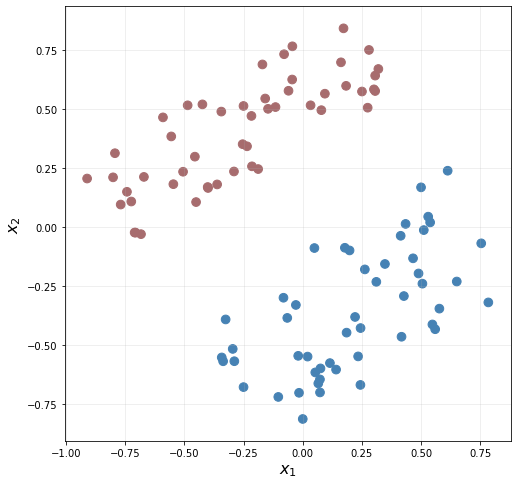

In [66]:
margin = 0.2 # subject to experiment
perc = Perceptron(n=100, margin=margin)
perc.plot_model(decision_boundary=False)

Margin is the minimum distance between the two different class data points. The classifier converges easily when the margin is higher. As the margin value reduces, it becomes even more difficult to linearly separate the data into positive and negative classes.

**Part 4 B [5 points]:** Modify the `train` method in the `Perceptron` class to perform the Perceptron Learning Algorithm and learn weights ${\bf w}$ and bias $b$ that perfectly classify the linearly separable training data. Your implementation should:

- Visit all training examples in a random shuffled order over each training epoch.
- Terminate when you finish an epoch without making a single classification error or when you hit the maximum number of epochs.
- Use the `self.num_mistakes` counter to count the total number of classification errors over the entire training process.


Notes:

You should not use Scikit-Learn's Perceptron object in your solution.
It's a good idea to implement a stopping criterion based on the `max_epochs` parameter as the first step. Later we'll look at training sets that will terminate on their own, but implementing a stopping mechanism will save you some pain in the development process.
Do not change the initial guess for the weights and bias. These values were chosen to match the example done in lecture for the unit tests.

In [67]:
from tests import tests
tests.run_test_suite('prob 1.4B', Perceptron)

TestNegMistake (tests.tests.TestPerceptron) ... ok
TestPosMistake (tests.tests.TestPerceptron) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.003s

OK


**Part 4 C [5 points]:** Modify the `plot_model` method so that it plots the learned decision boundary with the training data. Demonstrate that your method is working by training a perceptron with a margin of your choice and displaying the resulting plot. What is the equation of the learned decision boundary? (Use symbols not numbers.)


$${w}*{x}+b=0$$
where 

      w is the weight vector

      x is the input vector
      
      b is the bias

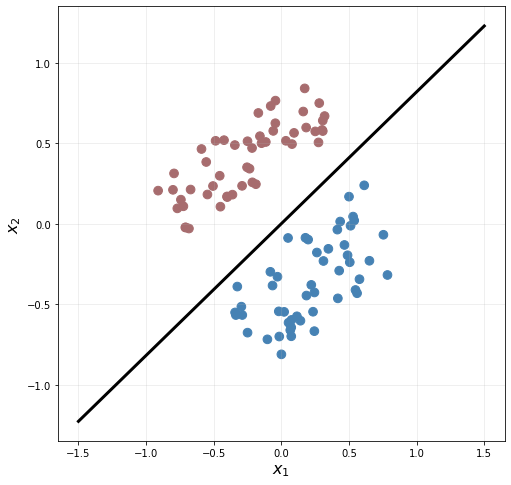

In [68]:
perc = Perceptron(n=100, margin=0.2)
perc.train()
perc.plot_model(decision_boundary=True)

**Part 5 [10 points]** : 

Verify the theorem which states that, if you train a perceptron on linearly separable training data with margin $M > 0$ and each training point satisfies $\|{\bf x}\|_2 \leq 1$ then the Perceptron algorithm will complete after making at most $1/M^2$ classification mistakes.

Do the following to verify the above statement: 
- Train perceptrons with $n = 100$ and different margins ($M=0.3, 0.1, 0.01, 0.001,$ and $0.0001$).
- Produce a log-log plot with $1/M$ on the horizontal axis and the total numbers of mistakes on the vertical axis. 
- On the same set of axes, plot the theoretical upper bound on the number of training mistakes.

Usually we run multiple simulations and get an averaged total number of mistakes for each margin, but it is fine if you only do once.

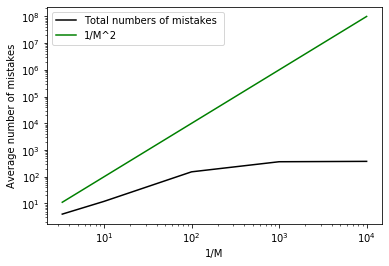

In [70]:
# YOUR CODE HERE
M=[0.3,0.1,0.01,0.001,0.0001]
inverseM=[]
mistakes=[]
averageM=[]
for m in M:
    p=Perceptron(n=100,margin=m)
    p.train()
    inverseM.append(1/m)
    mistakes.append(p.num_mistakes)
    averageM.append(1/np.square(m))
plt.loglog(inverseM,mistakes,color="black",label="Total numbers of mistakes ")
plt.loglog(inverseM,averageM,color="green",label="1/M^2")
plt.xlabel("1/M")
plt.ylabel("Average number of mistakes")
plt.legend()
#raise NotImplementedError()

**Extra Credit [5 points]** : 

* Explain the limitations of the vanilla perceptron implemented above.
* Provide pseudo code/steps to implement Voting Perceptron or Average Perceptron (see the textbook) and discuss the pros and cons (Compare space complexity)

**LIMITATION OF VANILLA PERCEPTRON**

The key issue with the vanilla perceptron is that it counts later points more than it counts earlier points.

**VOTING PERCEPTRON PSEUDO CODE**

**Training :**

Input : Labeled training set D containing ((x_1,y_1),(x_2,y_2),.....,(x_n,y_n))

        Number of epochs T
        
Output : A list of weighted perceptrons ((w_1,c_1),(w_2,c_2),.....,(w_k,c_k))

Initialize k=0,w_1=0,c_1=0

for Iter=1.....T do

    for i=1....n do
    
        Compute Prediction y_hat = sign(w_k * x_i + b_i)
        
        If y_hat = y then c_k = c_k + 1 //vote incremented for that weight wk
        
        else
        
            w_k+1 = w_k + y_i * x_i
            
            c_k+1 = 1
            
            k = k+1
            
**Prediction :**

Given : A list of weighted perceptrons ((w_1,c_1),(w_2,c_2),.....,(w_k,c_k))

        An unlabeled instance x
        
Compute a predicted label y_hat as follows :

s= for i=1 to k ∑ c_i sign(w_i * x + b_i)

y_hat=sign(s)

**Pro :**

This algorithm shows that it is guaranteed to generalize better than the vanilla perceptron.

**Con :**

It is completely impractical because as the number of weight vectors increases, the amount of storage required to store the weight vectors and their counts increases.

**AVERAGE PERCEPTRON PSEUDO CODE**

**Training :**

Input : Labeled training set D containing ((x1,y1),(x2,y2),.....,(xn,yn))

        Number of epochs T
        
Initialize w and u to zero vector

Initialize b and β to zero

Initialize c to 1

for iter = 1 ...T do
    
    for all (x,y) in D do
    
        if y (w * x + b) ≤ 0 then
            
            w = w + y x 
            
            b = b + y
            
            u = u + y c x 
            
            β = β + y c
        
        end if
        
        c = c + 1 end for
    
    end for

return w - 1/c  u, b - 1/c β
            
**Prediction :**

Given : Averaged weights and bias

        An unlabeled instance x
        
Compute a predicted label y_hat as follows :

y_hat = sign ( for i=1 to k ∑ ci . (wi . x + bi) )

**Pro :**

The advantage of the averaged perceptron is that we can simply maintain a running sum of the averaged weight vector and averaged bias. Test-time prediction is then just as efficient as it is with the vanilla perceptron.

### [60 points] Problem 2 : Logistic Regression + SGD

In this Problem, you'll implement a Logistic Regression classifier to predict whether person on the Titanic will survive or not.


Dataset has following attributes:

|Variable|Definition|Key|
|:----:|:----:|:---|
|survival|	Survival|	0 = No, 1 = Yes|
|pclass|	Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd|
|Age |Age in years	||
|fare	|Passenger fare|	|
|sibsp	|# of siblings / spouses aboard the Titanic| |
|parch	|# of parents / children aboard the Titanic	||
|sex	| Sex|	one hot encoded male, female|
|embarked | Port of Embarkation | one hot encoded C = Cherbourg, Q = Queenstown, S = Southampton|



Following is a class to load the titanic dataset.

In [71]:
# Make sure you have install pandas and numpy before you run.
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import exp, log
from collections import defaultdict

class Dataset:
    """
    Class to load dataset containing titanic survival features
    """

    def __init__(self, location, random_state=1241):
        # You shouldn't have to modify this class, but you can if you'd like
        # Load the dataset
        np.random.seed(random_state)
        f = gzip.open(location, 'rb')
        self.train_x, self.train_y, self.test_x, self.test_y = pickle.load(f)
        # appending biases
        self.train_x = np.concatenate((np.ones((self.train_x.shape[0], 1)), self.train_x), axis=1)
        self.test_x = np.concatenate((np.ones((self.test_x.shape[0], 1)), self.test_x), axis=1)
        f.close()
        
    @staticmethod
    def shuffle(X, y):
        """ Shuffle training data """
        shuffled_indices = np.random.permutation(len(y))
        return X[shuffled_indices], y[shuffled_indices]

**Part 1 [5 points]**

**Part 1 A [4 points]:** First, implement the `sigmoid` function to return the output by applying the sigmoid function $\sigma(z)$ to the input parameter, where the sigmoid function $\sigma(z)$ is defined as:
$$
\sigma(z) = \frac{1}{1+e^{-z}}
$$

In [72]:
def sigmoid(score, threshold=20.0):
    """
    Sigmoid function with a threshold
    :param score: A real valued number to convert into a number between 0 and 1
    :param threshold : Prevent overflow of exp by capping activation at 20.
    return sigmoid function result.
    """
    # TODO: Finish this function to return the output of applying the sigmoid
    # function to the input score (Please do not use external libraries)
    
    # YOUR CODE HERE
    if score>threshold:   
        sigma=1/(1+np.exp(-threshold))
    elif score<-threshold: 
        sigma=1/(1+np.exp(threshold))
    else:
        sigma=1/(1+np.exp(-score))
    return sigma
    #raise NotImplementedError()

In [73]:
# verify sigmoid implemention w/ scipy;
# note: you should NOT use scipy for your implementation!
from scipy.stats import logistic
assert np.isclose(sigmoid(1), logistic.cdf(1))
assert np.isclose(sigmoid(5), logistic.cdf(5))
assert np.isclose(sigmoid(100, threshold=20), logistic.cdf(20))
assert np.isclose(sigmoid(-1), logistic.cdf(-1))
assert np.isclose(sigmoid(-5), logistic.cdf(-5))
assert np.isclose(sigmoid(-100, threshold=20), logistic.cdf(-20))

**Part 1 B [1 point]:**

Next, implement the derivative of the `sigmoid` function, `sigmoid_grad`, i.e. $\frac{\partial\sigma(x)}{\partial x}$.

Hint: your implementation of `sigmoid_grad` should be able to use  your `sigmoid` function to compute the derivative!

In [74]:
def sigmoid_grad(y, threshold=20.0):
    """
    Derivative/gradient of the sigmoid function.
    :param y: A real valued input for which to compute the derivative.
    :param threshold : Prevent overflow of exp by capping activation at 20.
    return sigmoid derivative function result.
    """
    # TODO: Finish this function to return the output of applying the sigmoid
    # function to the input score (Please do not use external libraries)
    
    # YOUR CODE HERE
    if y>threshold :
        return sigmoid_grad(threshold,threshold)
    elif y<-threshold:
        return sigmoid_grad(-threshold,threshold)
    sigma_grad=np.exp(-y)*np.square(sigmoid(y,threshold))
    return sigma_grad
    #raise NotImplementedError()

In [75]:
# verify sigmoid_grad using numerical differentiation, i.e: f(x+h)-f(x-h) / 2h
epsilon = 1.0E-8
assert np.isclose(sigmoid_grad(1.0), (sigmoid(1.0 + epsilon) - sigmoid(1.0 - epsilon)) / (2.0*epsilon))
assert np.isclose(sigmoid_grad(0.1), (sigmoid(0.1 + epsilon) - sigmoid(0.1 - epsilon)) / (2.0*epsilon))

**Part 2 [35 points]**

**Part 2 A [15 points]**

The negative log likelihood objective is defined as:
$$
\textrm{NLL}(\boldsymbol{\beta}) = -\displaystyle\sum_{i=1}^n \left[y_i \log \sigma(\boldsymbol{\beta}^T{\bf x}^{(i)}) + (1-y_i)\log(1 - \sigma(\boldsymbol{\beta}^T{\bf x}^{(i)}))\right] 
$$

First, write down the derivative of the negative log likelihood objective function, with respect to $\boldsymbol{\beta}$. Since we are working with SGD, derive it for  $n=1$.

$$
\frac {d(NLL)}{d\beta} = \left(\sigma(\boldsymbol{\beta}^T{\bf x}^{(1)})-y_1\right){x_1}
$$

Next, using the `sigmoid` function implemented earlier, finish the `sgd_update` function so that it performs stochastic gradient descent on the single training example and updates the weight vector correspondingly without regularization.

In [76]:
import math
class LogReg:
    def __init__(self, num_features, eta):
        """
        Create a logistic regression classifier
        :param num_features: The number of features (including bias)
        :param eta: A function that takes the iteration as an argument (the default is a constant value)
        """
        self.w = np.zeros(num_features)
        self.eta = eta

    def progress(self, examples_x, examples_y):
        """
        Given a set of examples, compute the probability and accuracy
        :param examples: The dataset to score
        :return: A tuple of (log probability, accuracy)
        """

        logprob = 0.0
        num_right = 0
        for x_i, y in zip(examples_x, examples_y):
            p = sigmoid(self.w.dot(x_i))
            if y == 1:
                logprob += math.log(p)
            else:
                logprob += math.log(1.0 - p)

            # Get accuracy
            if abs(y - p) <= 0.5:
                num_right += 1

        return logprob, float(num_right) / float(len(examples_y))

    def sgd_update(self, x_i, y, lam = 0.0, current_iteration=None):
        """
        Compute a stochastic gradient update to improve the log likelihood.
        :param x_i: The features of the example to take the gradient with respect to
        :param y: The target output of the example to take the gradient with respect to
        :param lam : regularization term
        :return: Return the new value of the regression coefficients
        """

        # TODO: Finish this function to do a single stochastic gradient descent update
        
        # YOUR CODE HERE
        pi_i=sigmoid(self.w.dot(x_i))
        self.w[1:]=self.w[1:]-self.eta*(self.w[1:]*lam*2-x_i[1:]*(y-pi_i))
        self.w[0]=self.w[0]-self.eta*(-x_i[0]*(y-pi_i))
        #raise NotImplementedError()

In [77]:
from tests import tests
tests.run_test_suite('prob 2A', LogReg)

testPosUnregUpdate (tests.tests.TestLogReg) ... ok
testNegUnregUpdate (tests.tests.TestLogReg) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK


**Part 2 B [10 points]:** Complete the following code below to loop over the training data and perform stochastic gradient descent for the pre-defined number of epochs. You may try different combinations of `epochs` and learning rates `eta`.

Note: remember to shuffle your training data using `Dataset.shuffle` at the beginning of each epoch.

In [78]:
# TODO redefine learning rate and epochs accordingly
eta  = 1e-3
epochs = 500

dataset_handler = Dataset('./data/titanic.pklz')
lr = LogReg(dataset_handler.train_x.shape[1], eta)
print('Train Data :', dataset_handler.train_x.shape)
print('Test Data :', dataset_handler.test_x.shape)
# Iterations
iteration = 0
accuracy_array = []
for epoch in range(epochs):
    # TODO: Finish the code to loop over the training data and perform a stochastic
    # gradient descent update on each training example.
    # NOTE: It may be helpful to call upon the 'progress' method in the LogReg class
    # to make sure the algorithm is truly learning properly on both training and test data
# YOUR CODE HERE
    X_train,Y_train=dataset_handler.shuffle(dataset_handler.train_x,dataset_handler.train_y)
    X_test,Y_test=(dataset_handler.test_x,dataset_handler.test_y)
    for x_i, y in zip(X_train,Y_train):
        lr.sgd_update(x_i,y)
    train_logprob,train_accuracy=lr.progress(X_train,Y_train)
    test_logprob,test_accuracy=lr.progress(X_test,Y_test)
print("Training Accuracy : ",train_accuracy)
print("Testing Accuracy : ",test_accuracy)
#raise NotImplementedError()

Train Data : (796, 11)
Test Data : (200, 11)
Training Accuracy :  0.7487437185929648
Testing Accuracy :  0.75


**Part 2 C [5 points]:** Report train and test accuracy for the above experiments after 500 epochs with `eta` = 1e-3.

For the above experiments after 500 epochs with eta = 1e-3,

Training Accuracy :  0.7487437185929648

Testing Accuracy :  0.75

**Part 2 D [5 points]:** What is the role of the learning rate? What are the pros and cons of high/low learning rates? Do you see any trade-off? Plot accuracies of different $\eta$s together vs. number of epochs for both training and testing.

In [22]:
dataset_handler = Dataset('./data/titanic.pklz')
train_results = {}
test_results = {}
epochs = 1000
for eta in [1e-3, 1e-4, 1e-5, 1e-6]:
    lr = LogReg(dataset_handler.train_x.shape[1], eta)
    test_accuracy_array =[]
    train_accuracy_array = []
    for epoch in range(epochs):
        # TODO: Finish the code to loop over the training data and perform a stochastic
        # gradient descent update on each training example.
        # NOTE: It may be helpful to call upon the 'progress' method in the LogReg class
        # to make sure the algorithm is truly learning properly on both training and test data
    # YOUR CODE HERE
        X_train,Y_train=dataset_handler.shuffle(dataset_handler.train_x,dataset_handler.train_y)
        X_test,Y_test=dataset_handler.test_x,dataset_handler.test_y
        for x_i, y in zip(X_train,Y_train): 
            lr.sgd_update(x_i,y)
        train_logprob,train_accuracy=lr.progress(X_train,Y_train)
        test_logprob,test_accuracy=lr.progress(X_test,Y_test)
        if(epoch%50==0):
            train_accuracy_array.append(train_accuracy)
            test_accuracy_array.append(test_accuracy)
    train_accuracy_array.append(train_accuracy)
    test_accuracy_array.append(test_accuracy)
    train_results[eta]=train_accuracy_array
    test_results[eta]=test_accuracy_array
    #raise NotImplementedError()

Plot training results below.

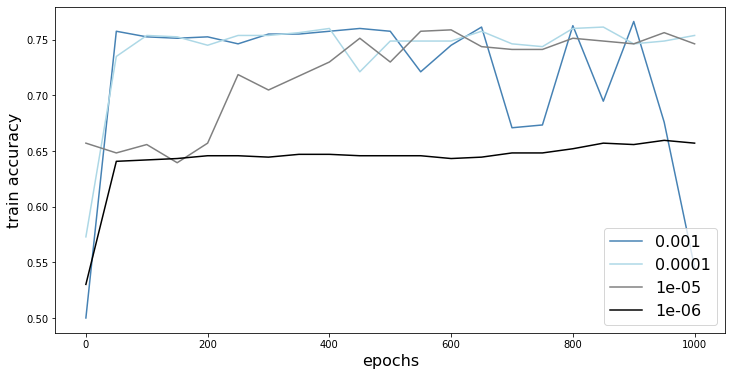

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
epochs_array = [i for i in range(0,1000,50)]
epochs_array.append(1000)
ax.plot(epochs_array, train_results[1e-3], color="steelblue", label=str(1e-3))
ax.plot(epochs_array, train_results[1e-4], color="lightblue", label=str(1e-4))
ax.plot(epochs_array, train_results[1e-5], color="grey", label=str(1e-5))
ax.plot(epochs_array, train_results[1e-6], color="black", label=str(1e-6))
ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel("epochs", fontsize=16)
ax.set_ylabel("train accuracy", fontsize=16)
plt.show()

Plot testing results below.

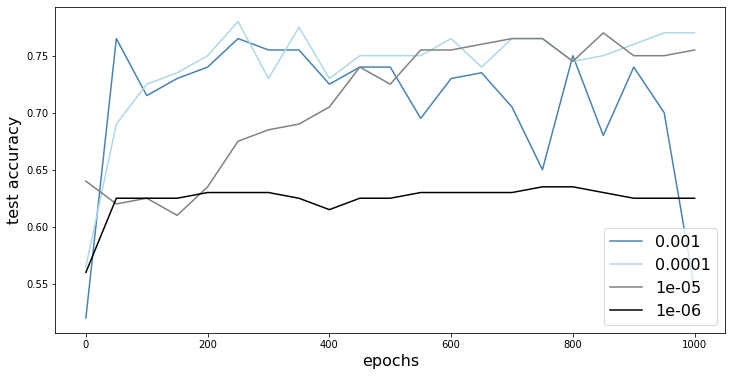

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
epochs_array = [i for i in range(0,1000,50)]
epochs_array.append(1000)
ax.plot(epochs_array, test_results[1e-3], color="steelblue", label=str(1e-3))
ax.plot(epochs_array, test_results[1e-4], color="lightblue", label=str(1e-4))
ax.plot(epochs_array, test_results[1e-5], color="grey", label=str(1e-5))
ax.plot(epochs_array, test_results[1e-6], color="black", label=str(1e-6))
ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel("epochs", fontsize=16)
ax.set_ylabel("test accuracy", fontsize=16)
plt.show()

The learning rate hyperparameter controls the rate or speed at which the model learns. The amount that the weights are updated during training is referred to as the step size or the learning rate.

Smaller learning rates require more training epochs given the smaller changes made to the weights each update, whereas larger learning rates result in rapid changes and require fewer training epochs.

A learning rate that is too large can cause the model to converge too quickly to a suboptimal solution, whereas a learning rate that is too small can cause the process to get stuck.

**Part 2 E [10 points]**:

Adding $l_2$ regularization to the feature parameters for NLL loss gives:

$$
\textrm{NLL}_{l_2}(\boldsymbol{\beta}) = -\displaystyle\sum_{i=1}^n \left[y_i \log \sigma(\boldsymbol{\beta}^T{\bf x}^{(i)}) + (1-y_i)\log(1 - \sigma(\boldsymbol{\beta}^T{\bf x}^{(i)}))\right] + \lambda\displaystyle\sum_{k=1}^{p} \beta_{k}^2
$$

where $p$ is the number of features, and $\beta_0$ is the bias term. Notice that $\beta_0$ is not included in the regularization term.

Write down the derivative of the regularized negative log likelihood loss function $\textrm{NLL}_{l_2}$ with respect to $\boldsymbol{\beta}$. Since we are working with SGD, derive it for $n=1$.

$$
For \ k=1 \ to \ p \ \frac{dNLL}{d\beta_k} = \left(\sigma\left(\boldsymbol{\beta}^T{\bf x}^{(1)}\right)-y_1\right){x^{(1)}}+ \lambda  2{\beta_k}
$$

Update your implementation of the `sgd_update` method so that it performs regularized SGD updates of the model parameters to minimize the regularized NLL loss function.

Remember, do **not** regularize the bias parameter $\beta_0$.

Provide train and test accuracy after above change with `lam=1e-5`.

In [79]:
from tests import tests
tests.run_test_suite('prob 2E', LogReg)

testNegRegUpdate (tests.tests.TestLogReg) ... ok
testPosRegUpdate (tests.tests.TestLogReg) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK


**Part 2 F [5 points]** Plot accuracies of different $\lambda$s together vs. epochs for both training and testing).

In [25]:
dataset_handler = Dataset('./data/titanic.pklz')
train_results = {}
test_results = {}
epochs = 1000
eta = 1e-5
for lam in [0, 0.01, 0.1]:
    lr = LogReg(dataset_handler.train_x.shape[1], eta)
    test_accuracy_array =[]
    train_accuracy_array = []
    for epoch in range(epochs):
        # TODO: Finish the code to loop over the training data and perform a stochastic
        # gradient descent update with regularization on each training example.
        # NOTE: It may be helpful to call upon the 'progress' method in the LogReg class
        # to make sure the algorithm is truly learning properly on both training and test data
    # YOUR CODE HERE
        X_train,Y_train=dataset_handler.shuffle(dataset_handler.train_x,dataset_handler.train_y)
        X_test,Y_test=dataset_handler.test_x,dataset_handler.test_y
        for x_i, y in zip(X_train,Y_train): 
            lr.sgd_update(x_i,y,lam)
        train_logprob,train_accuracy=lr.progress(X_train,Y_train)
        test_logprob,test_accuracy=lr.progress(X_test,Y_test)
        if epoch%50==0:
            train_accuracy_array.append(train_accuracy)
            test_accuracy_array.append(test_accuracy)
    train_accuracy_array.append(train_accuracy)
    test_accuracy_array.append(test_accuracy)
    train_results[lam]=train_accuracy_array
    test_results[lam]=test_accuracy_array
    #raise NotImplementedError()

Plot training results below.

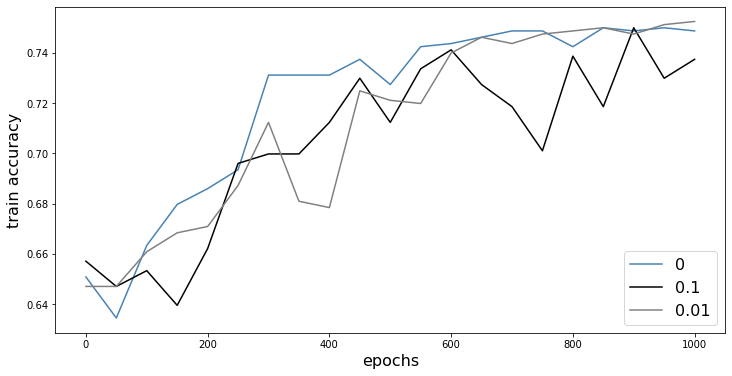

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
epochs_array = [i for i in range(0,1000,50)]
epochs_array.append(1000)
ax.plot(epochs_array, train_results[0], color="steelblue", label=str(0))
ax.plot(epochs_array, train_results[1e-1], color="black", label=str(1e-1))
ax.plot(epochs_array, train_results[1e-2], color="grey", label=str(1e-2))
ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel("epochs", fontsize=16)
ax.set_ylabel("train accuracy", fontsize=16)
plt.show()

Plot testing results below.

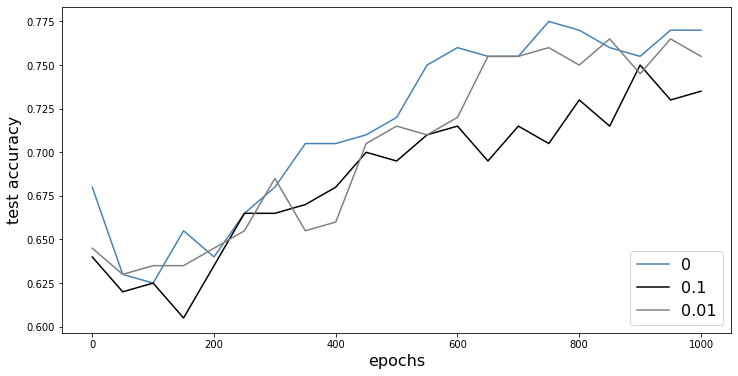

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
epochs_array = [i for i in range(0,1000,50)]
epochs_array.append(1000)
ax.plot(epochs_array, test_results[0], color="steelblue", label=str(0))
ax.plot(epochs_array, test_results[1e-1], color="black", label=str(1e-1))
ax.plot(epochs_array, test_results[1e-2], color="grey", label=str(1e-2))
ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel("epochs", fontsize=16)
ax.set_ylabel("test accuracy", fontsize=16)
plt.show()

**Part 2 F (continued)** What is the effect of regularization term with respect to accuracy? 

Since it is not ideal to maximize the likelihood of training data, Regularization term is used. It helps in avoiding overfitting.

Ideally, Regularization decreases training accuracy and increases the testing accuracy.

In some cases, Regularization could decrease the testing accuracy due to underfitting. For instance, in the above plot, high regularization value such as 0.1 results in underfitting where the accuracy decreases.

**Part 3 [5 points]** 

Time based Learning Rate is dynamic learning rate given the following equation:

$\textrm{LearningRate} = \eta\, / \,(1 + \textrm{decay} \cdot \textrm{current epoch})$

Train SGD with the dynamic learning rate defined above and follow these instructions:
* Use initial learning rate $\eta = 0.1$.
* Use $\textrm{decay} = 0.001$.
* Update learning rate `lr.eta` every epoch.
* Plot train accuracy and learning rate together for each epoch.


In [29]:
eta  = 1e-1
epochs = 200
dataset_handler = Dataset('./data/titanic.pklz')
lr = LogReg(dataset_handler.train_x.shape[1], eta)
learning_rates = []
train_accuracy_array = []
test_accuracy_array = []
for epoch in range(epochs):
    # TODO: Finish the code to loop over the training data and perform a stochastic
    # gradient descent update on each training example with dynamic learning rate in each epoch.
    # NOTE: It may be helpful to call upon the 'progress' method in the LogReg class
    # to make sure the algorithm is truly learning properly on both training and test data
    # YOUR CODE HERE
    lr.eta=lr.eta/(1+0.001*epoch)
    X_train,Y_train=dataset_handler.shuffle(dataset_handler.train_x,dataset_handler.train_y)
    X_test,Y_test=dataset_handler.test_x,dataset_handler.test_y
    for x_i, y in zip(X_train,Y_train): 
        lr.sgd_update(x_i,y)
    train_logprob,train_accuracy=lr.progress(X_train,Y_train)
    test_logprob,test_accuracy=lr.progress(X_test,Y_test)
    train_accuracy_array.append(train_accuracy)
    test_accuracy_array.append(test_accuracy)
    learning_rates.append(lr.eta)
#raise NotImplementedError()

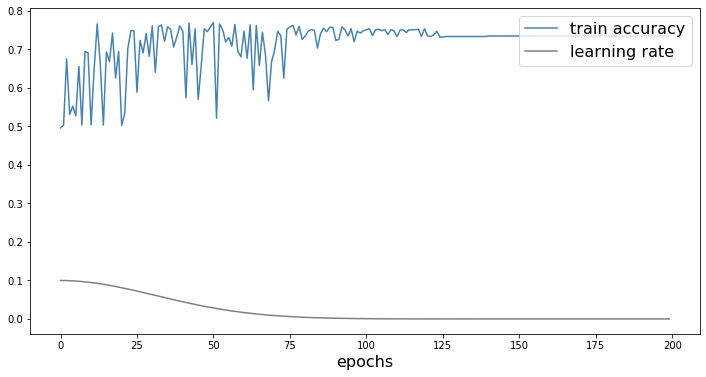

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
epochs_array = [i for i in range(0,200)]
ax.plot(epochs_array, train_accuracy_array, color="steelblue", label=str('train accuracy'))
ax.plot(epochs_array, learning_rates,color="grey", label=str('learning rate'))
ax.legend(loc="upper right", fontsize=16)
ax.set_xlabel("epochs", fontsize=16)
ax.set_ylabel("", fontsize=16)
plt.show()

### Optional survey.
***

We are always interested in your feedback. At the end of each homework, there is a simple anonymous feedback [survey](https://forms.gle/sC8ysdoyaDbFbB959) to solicit your feedback for how to improve the course.